# Relax Challenge

## Objective

To determine the factors that predict future user adoption.

## Load Imports

In [1]:
import pandas as pd
import os
import datetime as datetime
from collections import defaultdict
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'relax_challenge.ipynb',
 'relax_data_science_challenge.pdf',
 'takehome_users.csv',
 'takehome_user_engagement.csv']

## Load Files

In [3]:
users = pd.read_csv('takehome_users.csv')

In [4]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
user_engagement = pd.read_csv('takehome_user_engagement.csv')

In [7]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [9]:
user_df = pd.merge(user_engagement, users, left_on = 'user_id', right_on = 'object_id', how = 'left')

In [10]:
user_df.head()

,time_stamp,user_id,visited,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [11]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   time_stamp                  207917 non-null  object 
 1   user_id                     207917 non-null  int64  
 2   visited                     207917 non-null  int64  
 3   object_id                   207917 non-null  int64  
 4   creation_time               207917 non-null  object 
 5   name                        207917 non-null  object 
 6   email                       207917 non-null  object 
 7   creation_source             207917 non-null  object 
 8   last_session_creation_time  207917 non-null  float64
 9   opted_in_to_mailing_list    207917 non-null  int64  
 10  enabled_for_marketing_drip  207917 non-null  int64  
 11  org_id                      207917 non-null  int64  
 12  invited_by_user_id          116887 non-null  float64
dtypes: float64(2),

In [12]:
#Drop user_id since we already have an object_id 
user_df.drop(columns = ['object_id'], inplace = True)

# Data Wrangling

In [13]:
#Convert date columns to datetime objects
user_df.creation_time = pd.to_datetime(user_df.creation_time)
user_df.last_session_creation_time = pd.to_datetime(user_df.last_session_creation_time)
user_df.time_stamp = pd.to_datetime(user_df.time_stamp)

In [14]:
user_df.head()

,time_stamp,user_id,visited,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0


In [15]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_stamp                  207917 non-null  datetime64[ns]
 1   user_id                     207917 non-null  int64         
 2   visited                     207917 non-null  int64         
 3   creation_time               207917 non-null  datetime64[ns]
 4   name                        207917 non-null  object        
 5   email                       207917 non-null  object        
 6   creation_source             207917 non-null  object        
 7   last_session_creation_time  207917 non-null  datetime64[ns]
 8   opted_in_to_mailing_list    207917 non-null  int64         
 9   enabled_for_marketing_drip  207917 non-null  int64         
 10  org_id                      207917 non-null  int64         
 11  invited_by_user_id          116887 non-

## Creating the Status Feature

In [16]:
#Get earliest date of timestamp in pandas timedelta format
min_date = pd.to_datetime(user_df.time_stamp.min())

In [17]:
#Get latest date of timestamp in pandas timedelta format
max_date = pd.to_datetime(user_df.time_stamp.max())

In [18]:
#Create a 7-day window in pandas timedelta format
week = pd.to_timedelta(datetime.timedelta(days = 7))
week

Timedelta('7 days 00:00:00')

In [19]:
#Create list of 7-day periods between the earliest and latest time_stamp dates
periods = []
period_end = min_date
while period_end < (max_date - week):
    period_end += week
    periods.append(period_end)    

In [20]:
#Check count of number of periods
len(periods)

105

In [21]:
#Check sample of 5 periods
periods[:5]

[Timestamp('2012-06-07 08:20:06'),
 Timestamp('2012-06-14 08:20:06'),
 Timestamp('2012-06-21 08:20:06'),
 Timestamp('2012-06-28 08:20:06'),
 Timestamp('2012-07-05 08:20:06')]

In [22]:
#Create a dictionary of lists for user_ids
user_login_times = defaultdict(list)

In [23]:
#Create dictionary of user logins for each period
for user in users.object_id:
    user_login_times[user] = [0] * (len(periods) - 1)
    for login_time in user_df.loc[user_df.user_id == user, 'time_stamp']:
        for idx in range(len(periods) - 2):
            if periods[idx] < login_time <= periods[idx + 1]:
                user_login_times[user][idx] += 1

In [24]:
#Convert user_login_times to a dataframe
user_login_periods = pd.DataFrame(user_login_times)
user_login_periods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Columns: 12000 entries, 1 to 12000
dtypes: int64(12000)
memory usage: 9.5 MB


In [25]:
#Create a new feature called status and assign inactive to all users
user_df['status'] = 'inactive_user'

In [26]:
#Assign 'adopted_user' to status where max_weekly_logins is greater than or equal to 3
for user, max_weekly_logins in enumerate(user_login_periods.max()):
    if max_weekly_logins >= 3:
        user_df.loc[user_df.user_id == user, 'status'] = 'adopted_user'    

In [27]:
#Check count of status categories
user_df.status.value_counts()

inactive_user    184176
adopted_user      23741
Name: status, dtype: int64

In [28]:
#Check data imbalance
user_df.status.value_counts()[0] / user_df.status.value_counts()[1]

7.757718714460217

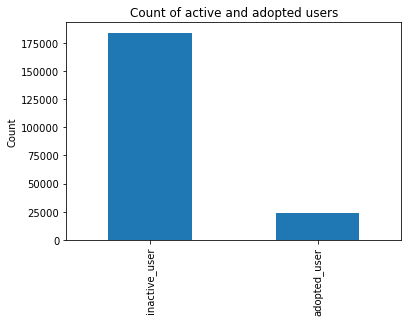

In [29]:
#Plot chart 
user_df.status.value_counts().plot.bar()
plt.title('Count of active and adopted users')
plt.ylabel('Count');

In [30]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_stamp                  207917 non-null  datetime64[ns]
 1   user_id                     207917 non-null  int64         
 2   visited                     207917 non-null  int64         
 3   creation_time               207917 non-null  datetime64[ns]
 4   name                        207917 non-null  object        
 5   email                       207917 non-null  object        
 6   creation_source             207917 non-null  object        
 7   last_session_creation_time  207917 non-null  datetime64[ns]
 8   opted_in_to_mailing_list    207917 non-null  int64         
 9   enabled_for_marketing_drip  207917 non-null  int64         
 10  org_id                      207917 non-null  int64         
 11  invited_by_user_id          116887 non-

## Reviewing Features

Using pandas profile report to check features

In [31]:
profile = ProfileReport(user_df, title="Pandas Profiling Report")

In [32]:
#profile

In [33]:
user_df.head(2)

,time_stamp,user_id,visited,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,status
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,adopted_user
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,inactive_user


### user_id, name and email

User_id, name and email, are unique identifiers for each user. These features are not relevant for predicting status because using them may lead to data leakage. 

### creation_time

In [34]:
user_df.creation_time.describe(datetime_is_numeric = True)

count                           207917
mean     2013-01-16 06:36:50.297734144
min                2012-05-31 00:43:27
25%                2012-08-22 20:39:37
50%                2012-12-06 02:21:47
75%                2013-05-12 20:39:27
max                2014-05-30 23:59:19
Name: creation_time, dtype: object

creation_time might be useful. Perhaps some individuals signed up for the service at a time when their industry required that tool.

### creation_source

In [35]:
user_df.creation_source.describe()

count         207917
unique             5
top       ORG_INVITE
freq           70091
Name: creation_source, dtype: object

In [36]:
user_df.creation_source.value_counts()

ORG_INVITE            70091
GUEST_INVITE          46796
SIGNUP                37545
SIGNUP_GOOGLE_AUTH    34263
PERSONAL_PROJECTS     19222
Name: creation_source, dtype: int64

creation_source may be a useful feature because it has 5 unique values that may influence variation of status. Organization signups may lead to more adoption than personal signups.

### last_session_creation_time

In [37]:
user_df.last_session_creation_time.describe(datetime_is_numeric = True)

count                           207917
mean     1970-01-01 00:00:01.399439486
min      1970-01-01 00:00:01.338452406
25%      1970-01-01 00:00:01.401044707
50%      1970-01-01 00:00:01.401664957
75%      1970-01-01 00:00:01.401868134
max      1970-01-01 00:00:01.402066730
Name: last_session_creation_time, dtype: object

We note that this feature is useless because it suggests that everyone logged in to a session on the same day. We will remove this feature.

### opted_in_to_mailing_list

In [38]:
user_df.opted_in_to_mailing_list.describe()

count    207917.000000
mean          0.258137
std           0.437611
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: opted_in_to_mailing_list, dtype: float64

In [39]:
user_df.opted_in_to_mailing_list.value_counts()

0    154246
1     53671
Name: opted_in_to_mailing_list, dtype: int64

This feature should be categorical because it only as 2 values - 0 and 1. It is an ordinal variable. It tells us whether or not an individual opted into a mailing list. Individuals who opt-in are likely ones that use the service frequently and are therefore adopters.

### enabled_for_marketing_drip

In [40]:
user_df.enabled_for_marketing_drip.describe()

count    207917.000000
mean          0.154533
std           0.361460
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: enabled_for_marketing_drip, dtype: float64

In [41]:
user_df.enabled_for_marketing_drip.value_counts()

0    175787
1     32130
Name: enabled_for_marketing_drip, dtype: int64

Similar to opted_in_to_mailing_list, enabled_for_marketing_drip is likely to be important because individuals who receive marketing information are more likely to use the service more often. It is also an ordinal variable. 

### org_id

In [42]:
user_df.org_id.describe()

count    207917.000000
mean        164.315895
std         121.165846
min           0.000000
25%          60.000000
50%         145.000000
75%         260.000000
max         416.000000
Name: org_id, dtype: float64

In [43]:
user_df.org_id.value_counts()

1      2298
13     2098
62     2072
4      2064
2      1967
       ... 
396       9
412       8
183       8
355       7
416       2
Name: org_id, Length: 417, dtype: int64

This uniquely identifies and organization using the service. It is likely to be important because certain organizations may use the service more often than others. It is also a nominal variable. 

### invited_by_user_id

In [44]:
user_df.invited_by_user_id.describe()

count    116887.000000
mean       5972.167555
std        3247.095621
min           3.000000
25%        3269.000000
50%        5972.000000
75%        8513.000000
max       11999.000000
Name: invited_by_user_id, dtype: float64

In [45]:
user_df.invited_by_user_id.value_counts()

4019.0    918
7816.0    903
3623.0    744
7358.0    712
6312.0    705
         ... 
3297.0      1
2878.0      1
6189.0      1
8324.0      1
5788.0      1
Name: invited_by_user_id, Length: 2229, dtype: int64

This feature may be important. It may suggest that individuals invited by someone are more likely to become adopters than individual invited by someone else. This is a nominal feature, and we note that it has high cardinality, so it usefulness may be limited. It also has missing values, which may suggest that these individuals were not invited.

### time_stamp

In [46]:
user_df.time_stamp.describe(datetime_is_numeric = True)

count                           207917
mean     2013-10-30 05:06:45.648763648
min                2012-05-31 08:20:06
25%                2013-07-16 20:17:21
50%                2013-12-03 06:38:34
75%                2014-03-13 08:00:24
max                2014-06-06 14:58:50
Name: time_stamp, dtype: object

the time_stamp feature is likely to be important because it gives us information on moments when users use the service.

### visited

In [47]:
user_df.visited.describe()

count    207917.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: visited, dtype: float64

In [48]:
user_df.visited.value_counts()

1    207917
Name: visited, dtype: int64

This feature has only one value and so is unlikely to be useful.

In [49]:
#Dropping useless features
useless_features = ['visited', 'last_session_creation_time', 'user_id', 'name', 'email']
user_df.drop(columns = useless_features, inplace = True)

In [50]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_stamp                  207917 non-null  datetime64[ns]
 1   creation_time               207917 non-null  datetime64[ns]
 2   creation_source             207917 non-null  object        
 3   opted_in_to_mailing_list    207917 non-null  int64         
 4   enabled_for_marketing_drip  207917 non-null  int64         
 5   org_id                      207917 non-null  int64         
 6   invited_by_user_id          116887 non-null  float64       
 7   status                      207917 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 14.3+ MB


## Dealing with Missing Values

We note that invited_by_user_id is the only feature with missing values. We can explore the nature of missingness.

In [51]:
#Review missingness of invited_by_user_id
user_df.invited_by_user_id.isnull().sum() / user_df.invited_by_user_id.shape[0]

0.43781893736442906

We observe that over 40% of users were not referred. 

## Converting Nominal Features that are Numeric to Objects

In [52]:
#Set numerical nominal features to objects
user_df.invited_by_user_id = user_df.invited_by_user_id.astype('object')
user_df.org_id = user_df.org_id.astype('object')

## Dealing with High Cardinality Features

### invited_by_user_id

In [53]:
user_df.invited_by_user_id.value_counts()

4019.0    918
7816.0    903
3623.0    744
7358.0    712
6312.0    705
         ... 
7916.0      1
7918.0      1
2801.0      1
2751.0      1
3.0         1
Name: invited_by_user_id, Length: 2229, dtype: int64

We can create a new feature that provides information on the type of referrer. Whether the referrer refers many people or not. We can set ordinal values for this feature.
- A 0 corresponds to no referral
- 1 to 4 corresponds to low, mid, high and very-high referers. 

In [54]:
#Define referrer feature and set default to 0
user_df['referrer_type'] = int(0)

In [55]:
referrer_counts = user_df.invited_by_user_id.value_counts()
referrer_counts

4019.0    918
7816.0    903
3623.0    744
7358.0    712
6312.0    705
         ... 
7916.0      1
7918.0      1
2801.0      1
2751.0      1
3.0         1
Name: invited_by_user_id, Length: 2229, dtype: int64

In [56]:
freq, bins = np.histogram(referrer_counts, bins = 4)

In [57]:
count_list = bins.tolist()
count_list

[1.0, 230.25, 459.5, 688.75, 918.0]

In [58]:
for referrer, count in referrer_counts.items():
    if count_list[0] < count <= count_list[1]:
        user_df.loc[user_df.invited_by_user_id == referrer, 'referrer_type'] = 1
    elif count_list[1] < count <= count_list[2]:
        user_df.loc[user_df.invited_by_user_id == referrer, 'referrer_type'] = 2
    elif count_list[2] < count <= count_list[3]:
        user_df.loc[user_df.invited_by_user_id == referrer, 'referrer_type'] = 3
    else:
        user_df.loc[user_df.invited_by_user_id == referrer, 'referrer_type'] = 4

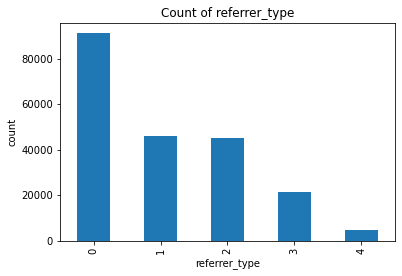

In [59]:
#View bar plot of referrer_type 
user_df.referrer_type.value_counts().plot.bar()
plt.title('Count of referrer_type')
plt.xlabel('referrer_type')
plt.ylabel('count');

### org_id

We can replicate the approach used to deal with the high cardinality of invited_by_user_id for org_id. We will divide organizations into 4 tiers related to how many users they have and set ordinal values for them ranging from 1 to 4. 
- 1 to 4 corresponds to low, mid, high and very-high users from an organization. 

In [60]:
#Define org_type feature and set default to 1
user_df['org_type'] = int(1)

In [61]:
org_counts = user_df.org_id.value_counts()
org_counts

1      2298
13     2098
62     2072
4      2064
2      1967
       ... 
396       9
183       8
412       8
355       7
416       2
Name: org_id, Length: 417, dtype: int64

In [62]:
freq_org, bins_org = np.histogram(org_counts, bins = 4)
count_list_org = bins_org.tolist()
count_list_org

[2.0, 576.0, 1150.0, 1724.0, 2298.0]

In [63]:
for org, org_count in org_counts.items():
    if count_list_org[1] < org_count <= count_list_org[2]:
        user_df.loc[user_df.org_id == org, 'org_type'] = 2
    elif count_list_org[2] < org_count <= count_list_org[3]:
        user_df.loc[user_df.org_id == org, 'org_type'] = 3
    elif count_list_org[3] < org_count <= count_list_org[4]:
        user_df.loc[user_df.org_id == org, 'org_type'] = 4

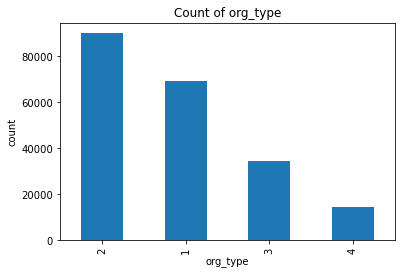

In [64]:
#View bar plot of org_type 
user_df.org_type.value_counts().plot.bar()
plt.title('Count of org_type')
plt.xlabel('org_type')
plt.ylabel('count');

In [65]:
#Having simplified our high-cardinality features, we can drop them
user_df.drop(columns = ['invited_by_user_id', 'org_id'], inplace = True)
user_df.head()

,time_stamp,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,status,referrer_type,org_type
0,2014-04-22 03:53:30,2014-04-22 03:53:30,GUEST_INVITE,1,0,adopted_user,4,2
1,2013-11-15 03:45:04,2013-11-15 03:45:04,ORG_INVITE,0,0,inactive_user,1,4
2,2013-11-29 03:45:04,2013-11-15 03:45:04,ORG_INVITE,0,0,inactive_user,1,4
3,2013-12-09 03:45:04,2013-11-15 03:45:04,ORG_INVITE,0,0,inactive_user,1,4
4,2013-12-25 03:45:04,2013-11-15 03:45:04,ORG_INVITE,0,0,inactive_user,1,4


## Engineering Datetime Features

We can breakdown our time_stamp and creation_time.

In [66]:
#Breakdown time_stamp
user_df['time_stamp_year'] = user_df.time_stamp.dt.year
user_df['time_stamp_month'] = user_df.time_stamp.dt.month
user_df['time_stamp_day'] = user_df.time_stamp.dt.day

#Breakdown creation_time
user_df['creation_time_year'] = user_df.creation_time.dt.year
user_df['creation_time_month'] = user_df.creation_time.dt.month
user_df['creation_time_day'] = user_df.creation_time.dt.day

#Drop time_stamp and creation_time
user_df.drop(columns = ['time_stamp', 'creation_time'], inplace = True)
user_df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,status,referrer_type,org_type,time_stamp_year,time_stamp_month,time_stamp_day,creation_time_year,creation_time_month,creation_time_day
0,GUEST_INVITE,1,0,adopted_user,4,2,2014,4,22,2014,4,22
1,ORG_INVITE,0,0,inactive_user,1,4,2013,11,15,2013,11,15
2,ORG_INVITE,0,0,inactive_user,1,4,2013,11,29,2013,11,15
3,ORG_INVITE,0,0,inactive_user,1,4,2013,12,9,2013,11,15
4,ORG_INVITE,0,0,inactive_user,1,4,2013,12,25,2013,11,15


# Modelling

## Splitting Features from Target

In [67]:
X = user_df.drop(columns = ['status'])
y = user_df.status.replace({'adopted_user': 1, 'inactive_user': 0})
feature_names = X.columns

In [68]:
y.value_counts()

0    184176
1     23741
Name: status, dtype: int64

## Encoding Categorical Variables

In [69]:
#Encoding categorical variables
X_dummies = pd.get_dummies(X)
features_coded = X_dummies.columns
X_dummies.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,referrer_type,org_type,time_stamp_year,time_stamp_month,time_stamp_day,creation_time_year,creation_time_month,creation_time_day,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,4,2,2014,4,22,2014,4,22,1,0,0,0,0
1,0,0,1,4,2013,11,15,2013,11,15,0,1,0,0,0
2,0,0,1,4,2013,11,29,2013,11,15,0,1,0,0,0
3,0,0,1,4,2013,12,9,2013,11,15,0,1,0,0,0
4,0,0,1,4,2013,12,25,2013,11,15,0,1,0,0,0


## Scaling Data

In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dummies)

## Creating Train / Test Split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 77)

## Base Model

In [72]:
rf = RandomForestClassifier()

In [73]:
rf.fit(X_train, y_train);

In [74]:
#Determine predictions for train and the test set
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [75]:
#Accuracy scores
rf.score(X_test, y_test)

0.9873028087726049

In [76]:
#Check confusion matrix
confusion_matrix(y_test, y_test_pred_rf)

array([[55122,   249],
       [  543,  6462]], dtype=int64)

In [77]:
#Check classification report
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     55371
           1       0.96      0.92      0.94      7005

    accuracy                           0.99     62376
   macro avg       0.98      0.96      0.97     62376
weighted avg       0.99      0.99      0.99     62376



In [78]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

In [79]:
forest_importances = pd.Series(importances, index= features_coded)

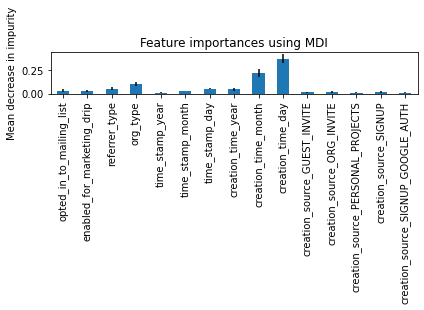

In [80]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

We note that all the features were important but the the creation_time_day was the most important feature.